# Importing the Data and The Libraries

In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

df = pd.read_csv("HumidityDataset.csv")

C:\Users\sherwin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (1,2,4,5,6,7,8,9,10,11,12,13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Dropping all the libraires and selecting only rows that start after the 2010

In [2]:
df.drop(["longitude","latitude", "WaveHeight", "WavePeriod", "MeanWaveDirection", "Hmax","QC_Flag"],inplace = True, axis = 1)
df = df.iloc[331371:]
buoy_ident = { 'M2':1 , 'M3': 2, 'M4':3, 'M5': 4, 'M6': 5}
# df.station_id.nunique()

In [3]:
# Selecting only the values of rows that have buoys ident as M2 to M6
df = df.loc[df.station_id.isin(buoy_ident.keys()) ]
df = df.drop(["time"], axis = 1)
# df.station_id.unique()

In [4]:
df = df.replace({ 'station_id': buoy_ident})
df = df.dropna(axis = 1, how='all')
df.reset_index(inplace = True)
df.dropna(inplace = True, how = 'all')
# df.head()

In [5]:
df = df.dropna()
df.drop('index', axis = 1, inplace = True)
# df.reset_index(inplace= True)
# df.isna()
# drop('index',axis = 1, inplace = True)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:,:-1].values,df.iloc[:,-1].values, test_size=0.2)

from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)

y_min = np.min(y_train)
max_min = np.max(y_train) - np.min(y_train)
y_train = (y_train-y_min)/max_min

In [7]:
# from sklearn.decomposition import PCA, FastICA
# ica = PCA(0.99)
# ica.fit(df_stand[:,:-1])
# x=ica.transform(df_stand[:,:-1])
# y = df_stand[:,-1]
# x[0:5, :]



# X_train, X_test, y_train, y_test = train_test_split(
#     df_stand[:,:-1],df_stand[:,-1], test_size=0.2, random_state=0)

# X_train, X_test, y_train, y_test = train_test_split(
#    x,y, test_size=0.2, random_state=0)

In [8]:
X_train.shape

(68427, 8)

In [9]:

physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [10]:
def model1():    
    model = keras.Sequential()
    model.add(Dense(10, activation = "relu",input_dim = 8, name = "layer1"))
    model.add(Dense(20, activation = "relu", name = "layer2"))
    model.add(Dense(20, activation = "relu", name = "layer5"))
    model.add(Dense(20, activation = "relu", name = "layer6"))

    model.add(Dense(1, activation = "relu", name = "layer7"))
    model.compile(loss="mean_squared_error", optimizer='SGD')
    return model

batch_size = 2048

estimator = KerasRegressor(build_fn=model1, epochs=1000, batch_size=4096, verbose=1)
history=estimator.fit(np.asarray(X_train).astype('float32'),np.asarray(y_train).astype('float32'))



#history = model.fit(x_pca, df.iloc[:, -1], batch_size=batch_size, epochs=20, validation_split=0.1)
# estimator = KerasRegressor(build_fn=model, epochs=100, batch_size=batch_size, verbose=0)
# history = model.fit(np.asarray(x).astype('float32'),np.asarray(y).astype('float32') , epochs=150, batch_size=50,  verbose=1, validation_split=0.3)
# kfold = KFold(n_splits=5)
# results = cross_val_score(estimator,np.asarray(x).astype('float32'), np.asarray(y).astype('float32'), cv=kfold)
# print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Epoch 1/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.2226
Epoch 2/1000
17/17 [==============================] - ETA: 0s - loss: 0.048 - 0s 5ms/step - loss: 0.0439
Epoch 3/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0296
Epoch 4/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0286
Epoch 5/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0283
Epoch 6/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0281
Epoch 7/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0278
Epoch 8/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.0276
Epoch 9/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.0273
Epoch 10/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.0271
Epoch 11/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0270
Epoch 12/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0268
E

17/17 [==============================] - 0s 4ms/step - loss: 0.0157
Epoch 101/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0155
Epoch 102/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0154
Epoch 103/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.0153
Epoch 104/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.0152
Epoch 105/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.0150
Epoch 106/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.0149
Epoch 107/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0148
Epoch 108/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0147
Epoch 109/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0146
Epoch 110/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.0144
Epoch 111/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0143
Epoch 112/1000
17/1

17/17 [==============================] - 0s 4ms/step - loss: 0.0067
Epoch 199/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0066
Epoch 200/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.0066
Epoch 201/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0065
Epoch 202/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0064
Epoch 203/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0064
Epoch 204/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0063
Epoch 205/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0063
Epoch 206/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0062
Epoch 207/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0062
Epoch 208/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0061
Epoch 209/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.0061
Epoch 210/1000
17/1

17/17 [==============================] - 0s 4ms/step - loss: 0.0037
Epoch 297/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 298/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 299/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.0036
Epoch 300/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0036
Epoch 301/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.0036
Epoch 302/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0035
Epoch 303/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0035
Epoch 304/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0035
Epoch 305/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.0035
Epoch 306/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.0035
Epoch 307/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.0035
Epoch 308/1000
17/1

17/17 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 395/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 396/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0022
Epoch 397/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0022
Epoch 398/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.0022
Epoch 399/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0022
Epoch 400/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0022
Epoch 401/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0022
Epoch 402/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 403/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0021
Epoch 404/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0021
Epoch 405/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0021
Epoch 406/1000
17/1

17/17 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 493/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 494/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.0012
Epoch 495/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 496/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 497/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 498/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 499/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 500/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 501/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.0012
Epoch 502/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 503/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.0012
Epoch 504/1000
17/1

17/17 [==============================] - 0s 3ms/step - loss: 6.4045e-04
Epoch 588/1000
17/17 [==============================] - 0s 3ms/step - loss: 6.3562e-04
Epoch 589/1000
17/17 [==============================] - 0s 3ms/step - loss: 6.3086e-04
Epoch 590/1000
17/17 [==============================] - 0s 5ms/step - loss: 6.2626e-04
Epoch 591/1000
17/17 [==============================] - 0s 4ms/step - loss: 6.2154e-04
Epoch 592/1000
17/17 [==============================] - 0s 4ms/step - loss: 6.1679e-04
Epoch 593/1000
17/17 [==============================] - 0s 4ms/step - loss: 6.1233e-04
Epoch 594/1000
17/17 [==============================] - 0s 4ms/step - loss: 6.0761e-04
Epoch 595/1000
17/17 [==============================] - 0s 4ms/step - loss: 6.0302e-04
Epoch 596/1000
17/17 [==============================] - 0s 4ms/step - loss: 5.9865e-04
Epoch 597/1000
17/17 [==============================] - 0s 4ms/step - loss: 5.9400e-04
Epoch 598/1000
17/17 [==============================] - 0s

17/17 [==============================] - 0s 4ms/step - loss: 3.1372e-04
Epoch 682/1000
17/17 [==============================] - 0s 4ms/step - loss: 3.1150e-04
Epoch 683/1000
17/17 [==============================] - 0s 5ms/step - loss: 3.0914e-04
Epoch 684/1000
17/17 [==============================] - 0s 4ms/step - loss: 3.0686e-04
Epoch 685/1000
17/17 [==============================] - 0s 4ms/step - loss: 3.0461e-04
Epoch 686/1000
17/17 [==============================] - 0s 4ms/step - loss: 3.0233e-04
Epoch 687/1000
17/17 [==============================] - 0s 4ms/step - loss: 3.0016e-04
Epoch 688/1000
17/17 [==============================] - 0s 4ms/step - loss: 2.9791e-04
Epoch 689/1000
17/17 [==============================] - 0s 5ms/step - loss: 2.9578e-04
Epoch 690/1000
17/17 [==============================] - 0s 4ms/step - loss: 2.9356e-04
Epoch 691/1000
17/17 [==============================] - 0s 4ms/step - loss: 2.9140e-04
Epoch 692/1000
17/17 [==============================] - 0s

17/17 [==============================] - 0s 3ms/step - loss: 1.6577e-04
Epoch 776/1000
17/17 [==============================] - 0s 4ms/step - loss: 1.6479e-04
Epoch 777/1000
17/17 [==============================] - 0s 4ms/step - loss: 1.6382e-04
Epoch 778/1000
17/17 [==============================] - 0s 4ms/step - loss: 1.6289e-04
Epoch 779/1000
17/17 [==============================] - 0s 3ms/step - loss: 1.6193e-04
Epoch 780/1000
17/17 [==============================] - 0s 3ms/step - loss: 1.6098e-04
Epoch 781/1000
17/17 [==============================] - 0s 3ms/step - loss: 1.6006e-04
Epoch 782/1000
17/17 [==============================] - 0s 3ms/step - loss: 1.5912e-04
Epoch 783/1000
17/17 [==============================] - 0s 3ms/step - loss: 1.5824e-04
Epoch 784/1000
17/17 [==============================] - 0s 4ms/step - loss: 1.5736e-04
Epoch 785/1000
17/17 [==============================] - 0s 4ms/step - loss: 1.5645e-04
Epoch 786/1000
17/17 [==============================] - 0s

17/17 [==============================] - 0s 3ms/step - loss: 1.0590e-04
Epoch 870/1000
17/17 [==============================] - 0s 3ms/step - loss: 1.0556e-04
Epoch 871/1000
17/17 [==============================] - 0s 5ms/step - loss: 1.0515e-04
Epoch 872/1000
17/17 [==============================] - 0s 4ms/step - loss: 1.0478e-04
Epoch 873/1000
17/17 [==============================] - 0s 5ms/step - loss: 1.0442e-04
Epoch 874/1000
17/17 [==============================] - 0s 4ms/step - loss: 1.0405e-04
Epoch 875/1000
17/17 [==============================] - 0s 3ms/step - loss: 1.0366e-04
Epoch 876/1000
17/17 [==============================] - 0s 3ms/step - loss: 1.0332e-04
Epoch 877/1000
17/17 [==============================] - 0s 3ms/step - loss: 1.0295e-04
Epoch 878/1000
17/17 [==============================] - 0s 3ms/step - loss: 1.0260e-04
Epoch 879/1000
17/17 [==============================] - 0s 4ms/step - loss: 1.0224e-04
Epoch 880/1000
17/17 [==============================] - 0s

17/17 [==============================] - 0s 3ms/step - loss: 8.1783e-05
Epoch 964/1000
17/17 [==============================] - 0s 3ms/step - loss: 8.1635e-05
Epoch 965/1000
17/17 [==============================] - 0s 3ms/step - loss: 8.1470e-05
Epoch 966/1000
17/17 [==============================] - 0s 5ms/step - loss: 8.1302e-05
Epoch 967/1000
17/17 [==============================] - 0s 4ms/step - loss: 8.1165e-05
Epoch 968/1000
17/17 [==============================] - 0s 5ms/step - loss: 8.0992e-05
Epoch 969/1000
17/17 [==============================] - 0s 4ms/step - loss: 8.0822e-05
Epoch 970/1000
17/17 [==============================] - 0s 3ms/step - loss: 8.0716e-05
Epoch 971/1000
17/17 [==============================] - 0s 3ms/step - loss: 8.0534e-05
Epoch 972/1000
17/17 [==============================] - 0s 5ms/step - loss: 8.0378e-05
Epoch 973/1000
17/17 [==============================] - 0s 3ms/step - loss: 8.0220e-05
Epoch 974/1000
17/17 [==============================] - 0s

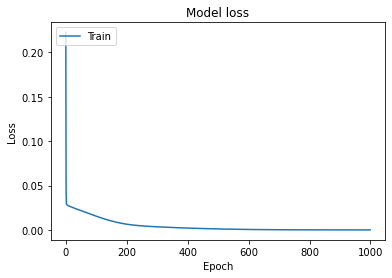

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [14]:
from sklearn.metrics import mean_squared_error

y_pred = estimator.predict(scaler.transform(X_test))
y_pred = max_min*y_pred + y_min
print(mean_squared_error(y_test, y_pred))


5/5 [==============================] - 0s 3ms/step
0.25300241531927953


In [15]:
np.column_stack((y_test,y_pred))

array([[78.0, 78.53963470458984],
       [76.0, 75.62279510498047],
       [84.0, 84.72077941894531],
       ...,
       [86.0, 86.83518981933594],
       [89.0, 88.91002655029297],
       [68.0, 68.13687133789062]], dtype=object)

In [ ]:
predTest = scaler.inverse_transform(np.column_stack((X_test, y_pred)))
ogTest = scaler.inverse_transform(np.column_stack((X_test, y_test)))
np.column_stack((predTest[:, -1], ogTest[:, -1]))

In [ ]:
x